# CSE 3683 Lab 1

The assignment for this notebook is to implement local search algorithms such as hill-climbing, random restart, and simulated annealing to perform function optimization.

In [5]:
# import required libraries
import time
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
# Create a complex objective function that we need to maximize.
# Here, the objective function is simply defined as an equation but
# more generally, it could represent natural phenomena, physical laws, or mathematical models
#   X: a 2-dimensional floating-point vector consisting of an x-value and a y-value
#   returns: a scalar floating-point value representing the output of the objective function
def objective_function(X):
    x = X[0]
    y = X[1]
    value = 3 * (1 - x) ** 2 * math.exp(-x ** 2 - (y + 1) ** 2) - 10 * (x / 5 - x ** 3 - y ** 5) * math.exp(
        -x ** 2 - y ** 2) - (1 / 3) * math.exp(-(x + 1) ** 2 - y ** 2)
    return value

# to limit the search space for this problem, we will only consider solutions
# where x ranges from -4 to 4 and y ranges from -4 to 4
lower_bounds = [-4, -4]
upper_bounds = [4, 4]

A 3D plot of the objective function can be viewed [here](https://c3d.libretexts.org/CalcPlot3D/index.html?type=z;z=3(1-x)%5E2*exp(-x%5E2-(y+1)%5E2)-10(x/5-x%5E3-y%5E5)*exp(-x%5E2-y%5E2)-(1/3)*exp(-(x+1)%5E2-y%5E2);visible=true;umin=-4;umax=4;vmin=-4;vmax=4;grid=30;format=normal;alpha=-1;hidemyedges=true;constcol=rgb(255,0,0);view=0;contourcolor=red;fixdomain=false;contourplot=true;showcontourplot=false;firstvalue=-1;stepsize=0.2;numlevels=11;list=;uselist=false;xnum=46;ynum=46;show2d=false;hidesurface=false;hidelabels=true;showprojections=false;surfacecontours=true;projectioncolor=rgba(255,0,0,1);showxygrid=false;showxygridonbox=false;showconstraint=false&type=window;hsrmode=3;nomidpts=true;anaglyph=-1;center=-5.2487653277286155,6.815843602039553,5.098503557610455,1;focus=0,0,0,1;up=0.39284920127083023,-0.3373981166615778,0.8554718089651412,1;transparent=false;alpha=140;twoviews=false;unlinkviews=false;axisextension=0.7;xaxislabel=x;yaxislabel=y;zaxislabel=z;edgeson=true;faceson=true;showbox=true;showaxes=true;showticks=true;perspective=true;centerxpercent=0.5;centerypercent=0.5;rotationsteps=30;autospin=true;xygrid=false;yzgrid=false;xzgrid=false;gridsonbox=true;gridplanes=false;gridcolor=rgb(128,128,128);xmin=-4;xmax=4;ymin=-4;ymax=4;zmin=-4;zmax=4;xscale=2;yscale=2;zscale=2;zcmin=-8;zcmax=8;xscalefactor=1;yscalefactor=1;zscalefactor=1;tracemode=0;keep2d=false;zoom=0.89)

In [ ]:
# Let's try to randomly generate several random inputs to the objective function
# and manually observe how the outputs change with different inputs

X = np.random.uniform(lower_bounds, upper_bounds)
value = objective_function(X)
print('objective_function(%.3f, %.3f) = %.3f' % (X[0], X[1], value))

objective_function(-2.120, 2.238) = 0.035


# Part A: Hill-climbing

In [106]:
# TODO: Hill-climbing search algorithm: a loop that continually moves in the direction of increasing value.
# It terminates when it reaches a “peak” where no neighbor has a higher value.
#   objective function: function to be maximized
#   initial_state: initial (x, y) vector
#   step_size: numerical interval by which to change the current (x,y) state to generate a new neighboring state
#   print_iters: set to True to print out the current value at each iteration
#   returns: best [x, y] solution found
def hill_climbing(objective_function, initial_state = np.array([0, 0]), step_size = 0.01, print_iters=True):

  # set the starting point of the search algorithm
  current_state = initial_state

  # loop until a peak is found
  i = 0
  while True:
    # Step 1: create a list of neighboring states to the current state
    # Step 2: calculate the objective function at each of the neighboring states
    # Step 3: determine the highest-valued neighboring state
    # Step 4: compare the highest value among neighboring states to the current value
    #         if the latter is higher, we have found a peak -> return the current state
    #         if the former is higher, assign current state to be the best neighbor state
    current_value = objective_function(current_state)
    neighbor_states = [current_state + np.array([step_size, 0]),
                       current_state - np.array([step_size, 0]),
                       current_state + np.array([0, step_size]),
                       current_state - np.array([0, step_size])]

    # bounds the arrays to previously declared lower and upper bounds of [-4,4]
    neighbor_states = np.clip(neighbor_states, lower_bounds, upper_bounds)
    neighbor_values = []
    for neighbor in neighbor_states:
      neighbor_values.append(objective_function(neighbor))

    best_neighbor_value = max(neighbor_values)
    if print_iters and (i + 1)%10 == 0:
      print('iteration: {}, current_state: {}, current_value: {}'.format(i+1, current_state, current_value))

    if best_neighbor_value <= current_value:
      return current_state
    else:
      current_state = neighbor_states[neighbor_values.index(best_neighbor_value)]
    i += 1

    # this break statement is added temporarily to prevent infinite loops
    # once the exit condition in Step 4 is implemented, the break statement can be removed
    # break


In [ ]:
hill_climbing_solution = hill_climbing(objective_function)
print('\nFinal answer:\n state:', hill_climbing_solution)

iteration: 10, current_state: [-0.09  0.  ], current_value: 1.3263451167508253
iteration: 20, current_state: [-0.16 -0.03], current_value: 1.64293411307946
iteration: 30, current_state: [-0.17 -0.12], current_value: 1.952502669461144
iteration: 40, current_state: [-0.19 -0.2 ], current_value: 2.280121378763975
iteration: 50, current_state: [-0.21 -0.28], current_value: 2.6119597227330225
iteration: 60, current_state: [-0.24 -0.35], current_value: 2.930094560836135
iteration: 70, current_state: [-0.28 -0.41], current_value: 3.2163650703935343
iteration: 80, current_state: [-0.32 -0.47], current_value: 3.4546410918818333
iteration: 90, current_state: [-0.36 -0.53], current_value: 3.631824858585324
iteration: 100, current_state: [-0.41 -0.58], current_value: 3.7406959833985103
iteration: 110, current_state: [-0.46 -0.63], current_value: 3.7765735263649094

Final answer:
 state: [-0.46 -0.63]


# Part B: Random Restart

In [104]:
from functools import update_wrapper
# TODO: Improvement to the Hill-climbing search algorithm using random restarts
#   objective function: function to be maximized
#   lower_bounds: minimum allowable values for the input vector to the objective function
#   upper_bounds: maximum allowable values for the input vector to the objective function
#   step_size: numerical interval by which to change the current (x,y) state to generate a new neighboring state
#   num_restarts: how many times to restart hill-climbing
#   returns: best [x, y] solution found
def random_restart_hill_climbing(objective_function, lower_bounds, upper_bounds, step_size = 0.01, num_restarts=20, print_iters=True):
  best_value = 0
  best_state = np.array([0,0])
  for i in range(num_restarts):
    current_state = np.random.uniform(lower_bounds, upper_bounds)
    temp_state = hill_climbing(objective_function, initial_state=current_state, print_iters=False)

    if print_iters:
      print('restarts: {}, hill_climbing_solution: {}, value: {}'.format(i, temp_state, objective_function(temp_state)))

    if objective_function(temp_state) > best_value:
      best_value = objective_function(temp_state)
      best_state = temp_state

  return best_state, best_value

In [123]:
random_restart_solution = random_restart_hill_climbing(objective_function, lower_bounds, upper_bounds)
print('\nFinal answer:\n state:{}, value:{}'.format(random_restart_solution[0], random_restart_solution[1]))

restarts: 0, hill_climbing_solution: [-0.00742259  1.58280934], value: 8.106152022589491
restarts: 1, hill_climbing_solution: [1.28592004e+00 1.08904336e-04], value: 3.592401897608769
restarts: 2, hill_climbing_solution: [-0.01086961  1.58493602], value: 8.105985081339366
restarts: 3, hill_climbing_solution: [ 1.28403952 -0.00824258], value: 3.5924267217238284
restarts: 4, hill_climbing_solution: [-0.46126367 -0.62773029], value: 3.776525139229184
restarts: 5, hill_climbing_solution: [ 1.29058157 -0.00407917], value: 3.592298747150234
restarts: 6, hill_climbing_solution: [-0.45881337 -0.62418344], value: 3.7763295484812343
restarts: 7, hill_climbing_solution: [-0.46527085 -0.63532129], value: 3.7761077125486127
restarts: 8, hill_climbing_solution: [-0.01149329  1.57923215], value: 8.106103353123636
restarts: 9, hill_climbing_solution: [-0.46156523 -0.63032475], value: 3.7765541151214186
restarts: 10, hill_climbing_solution: [-0.00944219  1.5848881 ], value: 8.106012577397214
restarts: 

# Part C: Simulated Annealing

In [24]:
# TODO: Simulated annealing algorithm
#   objective function: function to be maximized
#   lower_bounds: minimum allowable values for the input vector to the objective function
#   upper_bounds: maximum allowable values for the input vector to the objective function
#   returns: best [x, y] solution found

def simulated_annealing(objective_function, lower_bounds, upper_bounds, n_iters=6000, print_iters=True):
  current_state = np.random.uniform(lower_bounds, upper_bounds)
  current_value = objective_function(current_state)
  best_state = current_state; best_value = current_value
  T = 1
  n_iters = n_iters

  for iter in range(n_iters):
    # if T == 0:
    #   break
    next_state = np.clip(current_state + [random.uniform(-1, 1), random.uniform(-1, 1)], lower_bounds, upper_bounds)
    next_value = objective_function(next_state)
    delta_E = next_value - current_value

    # if either next value is outright greater or the probability to accept it is greater
    # then set the current state to the next state
    if delta_E > 0 or random.random() < np.exp(delta_E/T):
      current_state, current_value = next_state, next_value

      # self explanatory
      if current_value > best_value:
        best_state, best_value = current_state, current_value

    T -= 0.1

    # for neatness, show only the results for n*100 iterations
    if print_iters and (iter + 1)%100 == 0:
      print('iteration:{}, temperature:{}, best_solution:{}, best_value:{}'.format(iter+1, T, best_state, best_value))
  return best_state, best_value

In [102]:
best_state, best_value = simulated_annealing(objective_function, lower_bounds, upper_bounds, print_iters=True)
print('Simulated annealing solution is: state:{}, value:{}'.format(best_state, best_value))

iteration:100, temperature:-8.999999999999984, best_solution:[2.13915126 0.46290006], best_value:0.7843948382689698
iteration:200, temperature:-19.0, best_solution:[0.24698317 1.48385649], best_value:7.445404492057207
iteration:300, temperature:-29.000000000000142, best_solution:[-0.17649322  1.59688214], best_value:7.873154956940063
iteration:400, temperature:-39.000000000000284, best_solution:[-0.17649322  1.59688214], best_value:7.873154956940063
iteration:500, temperature:-49.000000000000426, best_solution:[-0.17649322  1.59688214], best_value:7.873154956940063
iteration:600, temperature:-59.00000000000057, best_solution:[-0.17649322  1.59688214], best_value:7.873154956940063
iteration:700, temperature:-69.00000000000036, best_solution:[-0.17649322  1.59688214], best_value:7.873154956940063
iteration:800, temperature:-78.99999999999979, best_solution:[-0.17649322  1.59688214], best_value:7.873154956940063
iteration:900, temperature:-88.99999999999922, best_solution:[-0.17649322  1.

# Extra Credits

2) Design your own objective function that has one or more local optima and one global
optimum. This function could be based on a natural phenomena, physical law, or mathematical
equation. Determine whether any or all of the local search algorithms implemented in this
assignment are able to find the global optimum for your custom objective function.

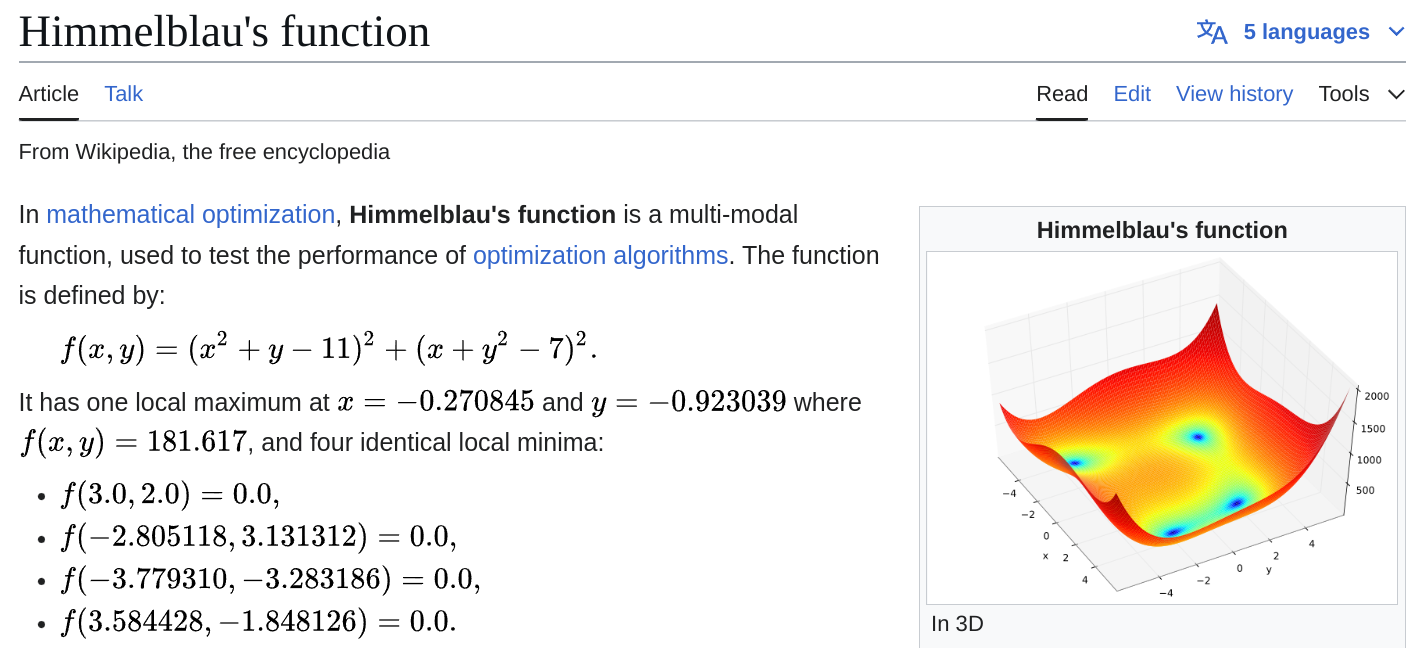

In [ ]:
def himmelblau_function(X):
    x = X[0]
    y = X[1]
    value = (x**2 + y -11)**2 + (x + y**2 - 7)**2
    return value

In [ ]:
# Trying Himmelblau with plain Hill Climbing
himmelblau_hc = hill_climbing(himmelblau_function)
print('\nFinal answer:\n state: {}, value: {}'.format(himmelblau_hc, himmelblau_function(himmelblau_hc)))

iteration: 10, current_state: [ 0.   -0.09], current_value: 171.87476561
iteration: 20, current_state: [ 0.   -0.19], current_value: 173.71200320999998
iteration: 30, current_state: [ 0.   -0.29], current_value: 175.29377281
iteration: 40, current_state: [-0.02 -0.37], current_value: 176.64486976999999
iteration: 50, current_state: [-0.06 -0.43], current_value: 177.82961697000002
iteration: 60, current_state: [-0.09 -0.5 ], current_value: 178.84936561
iteration: 70, current_state: [-0.13 -0.56], current_value: 179.70646657000003
iteration: 80, current_state: [-0.16 -0.63], current_value: 180.40162097
iteration: 90, current_state: [-0.19 -0.7 ], current_value: 180.93656320999997
iteration: 100, current_state: [-0.22 -0.77], current_value: 181.31436097
iteration: 110, current_state: [-0.25 -0.84], current_value: 181.53867761
iteration: 120, current_state: [-0.27 -0.92], current_value: 181.61641537

Final answer:
 state: [-0.27 -0.92], value: 181.61641537


In [ ]:
# Trying Himmelblau with Random Restart
custom_random_restart_state, custom_random_restart_value = random_restart_hill_climbing(himmelblau_function, lower_bounds, upper_bounds, step_size=0.01)
print('\nFinal answer:\n state:{}, value:{}'.format(custom_random_restart_state, custom_random_restart_value))

restarts: 0, hill_climbing_solution: [-0.2693336  -0.91994333], value: 181.6163672035376
restarts: 1, hill_climbing_solution: [-4.  4.], value: 106.0
restarts: 2, hill_climbing_solution: [-0.26730829 -0.92039697], value: 181.61613789361812
restarts: 3, hill_climbing_solution: [0.75571887 4.        ], value: 136.50466430986444
restarts: 4, hill_climbing_solution: [-0.26912929 -0.92060654], value: 181.61638579352132

Final answer:
 state:[-0.26912929 -0.92060654], value:181.61638579352132


In [ ]:
custom_annealing_state, custom_annealing_value = simulated_annealing(himmelblau_function, lower_bounds, upper_bounds, n_iters=200, print_iters=True)
print('\nFinal answer:\n state:{}, value:{}'.format(custom_annealing_state, custom_annealing_value))

iteration:100, temperature:-8.999999999999984, best_solution:[-0.77906505 -0.51082493], best_value:175.41682785519345
iteration:200, temperature:-19.0, best_solution:[-0.23757119 -1.02286959], best_value:181.52774248129694

Final answer:
 state:[-0.23757119 -1.02286959], value:181.52774248129694


Making the algorithms work fine with Himmelblau's function is a bit tough because the parameters hardcoded in those algorithms might not necessarily fit the needs to process the objective function. I still tried my best :)

All 3 algorithms found the global optima (maxima) for Himmelblau function

# Algorithm optimization

3) Open-ended. Implement any visualization or algorithmic improvements to the
program. In your report, justify the change and explain how it is advantageous compared to the original program.

My attempt to optimize Hill Climbing algo.

1. I hard coded the current_state, step_size, and upper/lower bounds so that these values are readily available and the program doesn't have to look up these variables.

2. I replaced the 'for loop' that calculates and appends the objective functions of the neighbor states with a list comprehension, which is slightly faster. Not much faster, but still faster...

3. I used the numpy's argmax function to find the index of the biggest element in the neighbor state value list.

  I previously used ```neighbor_states[neighbor_values.index(best_neighbor_value)]```.

  Now, I changed to ```neighbor_states[np.argmax(neighbor_values)]```; much cleaner and slightly faster, I'd say.

4. I called the numpy clip function simultaneously while creating the neighbor states, which saved one extra function call.

Collectively, these small changes optimize the program, even to its tiniest. The effects would be more noticeable if this program were larger.

In [ ]:
def optimized_hc():
  current_state = np.array([0, 0])
  i = 0
  while True:
    current_value = objective_function(current_state)
    neighbor_states = np.clip([current_state + np.array([0.01, 0]),
                       current_state - np.array([0.01, 0]),
                       current_state + np.array([0, 0.01]),
                       current_state - np.array([0, 0.01])], [-4, -4], [4, 4])

    neighbor_values = [objective_function(state) for state in neighbor_states]
    best_index = np.argmax(neighbor_values)
    if (i + 1)%10 == 0:
      print('iteration: {}, current_state: {}, current_value: {}'.format(i+1, current_state, current_value))

    if max(neighbor_values) <= current_value:
      return current_state
    else:
      current_state = neighbor_states[best_index]
    i += 1

print('\nFinal answer:\n state:', optimized_hc())

iteration: 10, current_state: [-0.09  0.  ], current_value: 1.3263451167508253
iteration: 20, current_state: [-0.16 -0.03], current_value: 1.64293411307946
iteration: 30, current_state: [-0.17 -0.12], current_value: 1.952502669461144
iteration: 40, current_state: [-0.19 -0.2 ], current_value: 2.280121378763975
iteration: 50, current_state: [-0.21 -0.28], current_value: 2.6119597227330225
iteration: 60, current_state: [-0.24 -0.35], current_value: 2.930094560836135
iteration: 70, current_state: [-0.28 -0.41], current_value: 3.2163650703935343
iteration: 80, current_state: [-0.32 -0.47], current_value: 3.4546410918818333
iteration: 90, current_state: [-0.36 -0.53], current_value: 3.631824858585324
iteration: 100, current_state: [-0.41 -0.58], current_value: 3.7406959833985103
iteration: 110, current_state: [-0.46 -0.63], current_value: 3.7765735263649094

Final answer:
 state: [-0.46 -0.63]
